In [228]:
#Instalamos dependencias
import os
import glob
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

In [229]:
# Cargar el archivo (si es CSV)
#Primer data set 2023
df1 = pd.read_csv('2023.csv')
df1.head()

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,AQS Parameter Description,Method Code,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/01/2023,AQS,60010007,1,0.034,ppm,31,Livermore,17,100.0,...,Ozone,47,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
1,01/02/2023,AQS,60010007,1,0.029,ppm,27,Livermore,17,100.0,...,Ozone,47,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
2,01/03/2023,AQS,60010007,1,0.022,ppm,20,Livermore,17,100.0,...,Ozone,47,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
3,01/04/2023,AQS,60010007,1,0.041,ppm,38,Livermore,17,100.0,...,Ozone,47,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
4,01/05/2023,AQS,60010007,1,0.036,ppm,33,Livermore,17,100.0,...,Ozone,47,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217


In [230]:
#data set 2024

df2=pd.read_csv('2024.csv')
df2.head()

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,AQS Parameter Description,Method Code,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/01/2024,AQS,60010007,1,0.031,ppm,29,Livermore,17,100.0,...,Ozone,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
1,01/02/2024,AQS,60010007,1,0.037,ppm,34,Livermore,17,100.0,...,Ozone,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
2,01/03/2024,AQS,60010007,1,0.032,ppm,30,Livermore,17,100.0,...,Ozone,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
3,01/04/2024,AQS,60010007,1,0.026,ppm,24,Livermore,17,100.0,...,Ozone,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
4,01/05/2024,AQS,60010007,1,0.027,ppm,25,Livermore,17,100.0,...,Ozone,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217


In [231]:
df1 = pd.read_csv('2023.csv')
df2 = pd.read_csv('2024.csv')
# Carga solo df1 y df2 para entrenar
df = pd.concat([df1, df2])
df

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,AQS Parameter Description,Method Code,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/01/2023,AQS,60010007,1,0.034,ppm,31,Livermore,17,100.0,...,Ozone,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
1,01/02/2023,AQS,60010007,1,0.029,ppm,27,Livermore,17,100.0,...,Ozone,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
2,01/03/2023,AQS,60010007,1,0.022,ppm,20,Livermore,17,100.0,...,Ozone,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
3,01/04/2023,AQS,60010007,1,0.041,ppm,38,Livermore,17,100.0,...,Ozone,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
4,01/05/2023,AQS,60010007,1,0.036,ppm,33,Livermore,17,100.0,...,Ozone,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54254,12/27/2024,AQS,61131003,1,0.027,ppm,25,Woodland-Gibson Road,17,100.0,...,Ozone,87.0,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",6,California,113,Yolo,38.661210,-121.732690
54255,12/28/2024,AQS,61131003,1,0.030,ppm,28,Woodland-Gibson Road,17,100.0,...,Ozone,87.0,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",6,California,113,Yolo,38.661210,-121.732690
54256,12/29/2024,AQS,61131003,1,0.043,ppm,40,Woodland-Gibson Road,17,100.0,...,Ozone,87.0,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",6,California,113,Yolo,38.661210,-121.732690
54257,12/30/2024,AQS,61131003,1,0.035,ppm,32,Woodland-Gibson Road,17,100.0,...,Ozone,87.0,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",6,California,113,Yolo,38.661210,-121.732690


In [232]:
print(df.columns)

Index(['Date', 'Source', 'Site ID', 'POC',
       'Daily Max 8-hour Ozone Concentration', 'Units', 'Daily AQI Value',
       'Local Site Name', 'Daily Obs Count', 'Percent Complete',
       'AQS Parameter Code', 'AQS Parameter Description', 'Method Code',
       'CBSA Code', 'CBSA Name', 'State FIPS Code', 'State',
       'County FIPS Code', 'County', 'Site Latitude', 'Site Longitude'],
      dtype='object')


In [233]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')
    df = df.dropna(subset=['Date'])
    df = df.sort_values('Date').reset_index(drop=True)
else:
    raise KeyError("La columna 'Date' no está en el DataFrame.")

df.head()


,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,AQS Parameter Description,Method Code,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,2023-01-01,AQS,60010007,1,0.034,ppm,31,Livermore,17,100.0,...,Ozone,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
1,2023-01-01,AQS,60190007,1,0.026,ppm,24,Fresno-Drummond,17,100.0,...,Ozone,199.0,23420.0,"Fresno, CA",6,California,19,Fresno,36.705474,-119.741332
2,2023-01-01,AQS,60190011,1,0.028,ppm,26,Fresno - Garland,17,100.0,...,Ozone,87.0,23420.0,"Fresno, CA",6,California,19,Fresno,36.785380,-119.773210
3,2023-01-01,AQS,60290008,1,0.034,ppm,31,Maricopa,17,100.0,...,Ozone,87.0,12540.0,"Bakersfield, CA",6,California,29,Kern,35.051454,-119.402620
4,2023-01-01,AQS,60658005,1,0.037,ppm,34,Mira Loma (Van Buren),17,100.0,...,Ozone,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",6,California,65,Riverside,33.996360,-117.492400


In [234]:
print(df['Daily Max 8-hour Ozone Concentration'])


0         0.034
1         0.026
2         0.028
3         0.034
4         0.037
          ...  
108851    0.035
108852    0.022
108853    0.013
108854    0.049
108855    0.031
Name: Daily Max 8-hour Ozone Concentration, Length: 108856, dtype: float64


In [235]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split

In [236]:
# Extraer año y mes
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Crear columnas one-hot
df = pd.get_dummies(df, columns=['Year', 'Month'], prefix=['Year', 'Month'])

print(df.head())


        Date Source   Site ID  POC  Daily Max 8-hour Ozone Concentration  \
0 2023-01-01    AQS  60010007    1                                 0.034   
1 2023-01-01    AQS  60190007    1                                 0.026   
2 2023-01-01    AQS  60190011    1                                 0.028   
3 2023-01-01    AQS  60290008    1                                 0.034   
4 2023-01-01    AQS  60658005    1                                 0.037   

  Units  Daily AQI Value        Local Site Name  Daily Obs Count  \
0   ppm               31              Livermore               17   
1   ppm               24        Fresno-Drummond               17   
2   ppm               26       Fresno - Garland               17   
3   ppm               31               Maricopa               17   
4   ppm               34  Mira Loma (Van Buren)               17   

   Percent Complete  ...  Month_3 Month_4  Month_5  Month_6 Month_7  Month_8  \
0             100.0  ...    False   False    False    

In [237]:
df['Year_2024']

,Year_2024
0,False
1,False
2,False
3,False
4,False
...,...
108851,True
108852,True
108853,True
108854,True


In [238]:
# Variables categóricas a one-hot: Site ID, Method Code, CBSA Code, State FIPS Code, County FIPS Code
cat_cols = ['Site ID', 'Method Code', 'CBSA Code', 'State FIPS Code', 'County FIPS Code']

# Variables numéricas
num_cols = ['Daily AQI Value', 'Daily Obs Count', 'Percent Complete', 'Site Latitude', 'Site Longitude']

# Variables one-hot que ya tienes: Year_* y Month_*

# Aplicar one-hot encoding a las categóricas
X_cat = pd.get_dummies(df[cat_cols].astype(str), drop_first=True)

# Juntar todo
X_final = pd.concat([df[num_cols], X_cat, df[[col for col in df.columns if col.startswith('Year_') or col.startswith('Month_')]]], axis=1)

print(X_final.head())


   Daily AQI Value  Daily Obs Count  Percent Complete  Site Latitude  \
0               31               17             100.0      37.687526   
1               24               17             100.0      36.705474   
2               26               17             100.0      36.785380   
3               31               17             100.0      35.051454   
4               34               17             100.0      33.996360   

   Site Longitude  Site ID_60010009  Site ID_60010011  Site ID_60010013  \
0     -121.784217             False             False             False   
1     -119.741332             False             False             False   
2     -119.773210             False             False             False   
3     -119.402620             False             False             False   
4     -117.492400             False             False             False   

   Site ID_60010016  Site ID_60012001  ...  Month_3  Month_4  Month_5  \
0             False             False  ... 

In [239]:
#VARIABLE OBJETIVO

y = df['Daily Max 8-hour Ozone Concentration']


In [240]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

# Modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación (opcional)
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"R2: {r2:.3f}")


RMSE: 0.004
R2: 0.917


In [241]:
# Cargar data 2025
df_2025 = pd.read_csv('2025.csv')

# Convertir columna fecha a datetime y extraer año y mes
df_2025['Date'] = pd.to_datetime(df_2025['Date'], format='%m/%d/%Y')
df_2025['Year'] = df_2025['Date'].dt.year
df_2025['Month'] = df_2025['Date'].dt.month


In [242]:
# COMPARACIÓN CON RESPECTO A 2025
try:
    df_2025 = pd.read_csv('2025.csv')
    print("Columnas en df_2025:", df_2025.columns.tolist())  # Verificar columnas
except FileNotFoundError:
    print("Archivo 'data/ad_viz_plotval_data_2025.csv' no encontrado. Verifica la ruta o crea datos hipotéticos.")
    raise

# Verificar si 'Date' existe
if 'Date' not in df_2025.columns:
    raise KeyError("La columna 'Date' no está en df_2025. Verifica el CSV.")

# Convertir 'Date' a datetime y extraer año y mes
try:
    df_2025['Date'] = pd.to_datetime(df_2025['Date'], format='%m/%d/%Y', errors='coerce')
    if df_2025['Date'].isna().all():
        print("Error: Todas las fechas fallaron en la conversión. Revisa el formato en el CSV.")
        raise ValueError("Formato de fecha incorrecto.")
    df_2025['Year'] = df_2025['Date'].dt.year
    df_2025['Month'] = df_2025['Date'].dt.month
    print("Primeras filas de df_2025 después de procesar 'Date':")
    print(df_2025[['Date', 'Year', 'Month']].head())
except Exception as e:
    print(f"Error al procesar 'Date': {e}")
    raise

# Aplicar one-hot encoding
categorical_cols = ['Year', 'Month', 'Method Code', 'Site ID', 'CBSA Code', 'State FIPS Code', 'County FIPS Code']
missing_cols = [col for col in categorical_cols if col not in df_2025.columns]
if missing_cols:
    print(f"Error: Las siguientes columnas no están en df_2025: {missing_cols}")
    raise KeyError(f"Columnas faltantes: {missing_cols}")

df_2025 = pd.get_dummies(df_2025, columns=categorical_cols, drop_first=True)
print("Primeras filas de df_2025 después de one-hot encoding:")
print(df_2025.head())


Columnas en df_2025: ['Date', 'Source', 'Site ID', 'POC', 'Daily Max 8-hour Ozone Concentration', 'Units', 'Daily AQI Value', 'Local Site Name', 'Daily Obs Count', 'Percent Complete', 'AQS Parameter Code', 'AQS Parameter Description', 'Method Code', 'CBSA Code', 'CBSA Name', 'State FIPS Code', 'State', 'County FIPS Code', 'County', 'Site Latitude', 'Site Longitude']
Primeras filas de df_2025 después de procesar 'Date':
        Date  Year  Month
0 2025-01-01  2025      1
1 2025-01-02  2025      1
2 2025-01-03  2025      1
3 2025-01-04  2025      1
4 2025-01-05  2025      1
Primeras filas de df_2025 después de one-hot encoding:
        Date  Source  POC  Daily Max 8-hour Ozone Concentration Units  \
0 2025-01-01  AirNow    1                                 0.010   ppm   
1 2025-01-02  AirNow    1                                 0.016   ppm   
2 2025-01-03  AirNow    1                                 0.029   ppm   
3 2025-01-04  AirNow    1                                 0.020   ppm   
4

In [243]:
# Añadir columnas que faltan y ponerlas a 0
for col in X_final.columns:
    if col not in df_2025.columns:
        df_2025[col] = 0

# Seleccionar solo las columnas necesarias en el mismo orden
X_2025 = df_2025[X_final.columns]



In [244]:
# Asegurarse que y_2025 esté bien definido
y_2025 = df_2025['Daily Max 8-hour Ozone Concentration']


In [245]:

# Predecir para 2025
y_2025_pred = model.predict(X_2025)

# Evaluar las predicciones con métricas
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse_2025 = np.sqrt(mean_squared_error(y_2025, y_2025_pred))
r2_2025 = r2_score(y_2025, y_2025_pred)

print(f'RMSE para 2025: {rmse_2025:.3f}')
print(f'R2 para 2025: {r2_2025:.3f}')


RMSE para 2025: 0.004
R2 para 2025: 0.896


/tmp/ipython-input-2774258364.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


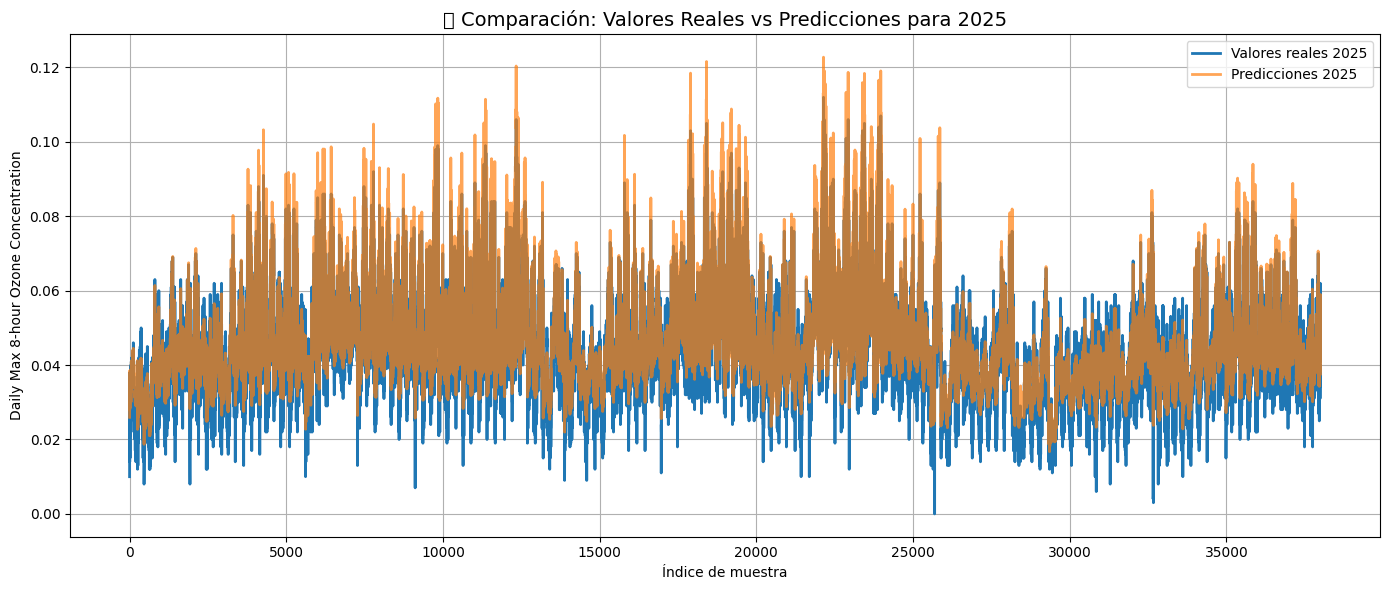

In [246]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(y_2025.values, label='Valores reales 2025', linewidth=2)
plt.plot(y_2025_pred, label='Predicciones 2025', linewidth=2, alpha=0.7)
plt.title('📊 Comparación: Valores Reales vs Predicciones para 2025', fontsize=14)
plt.xlabel('Índice de muestra')
plt.ylabel('Daily Max 8-hour Ozone Concentration')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [247]:
from sklearn.metrics import mean_absolute_error

mae_2025 = mean_absolute_error(y_2025, y_2025_pred)
print(f'MAE para 2025: {mae_2025:.3f}')


MAE para 2025: 0.003
